In [3]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Complete for Iris and Wine datasets

In [4]:
feature_matrix, labels = loadIris()
class1 = feature_matrix[0:50, 0:4] # this is for iris dataset
class2 = feature_matrix[50:100, 0:4]
class3 = feature_matrix[100:150, 0:4]

NameError: name 'loadIris' is not defined

In [ ]:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import pandas as pd


def loadIris():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    feature_matrix = X
    labels = y
    return feature_matrix, labels

def loadWine():
    df = pd.io.parsers.read_csv(
        'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
        header=None,
        )
    X_wine = df.values[:,1:]
    y_wine = df.values[:,0]-1 #classes start at 0

def fisherLDA(feature_matrix):
    class1 = feature_matrix[0:50, 0:4] # this is for iris dataset
    class2 = feature_matrix[50:100, 0:4]
    class3 = feature_matrix[100:150, 0:4]
    
    # build S_W matrix (sum of within-class covariance matrices)
    print (np.cov(class1).shape)
    
    S_W = sum([np.cov(c) for c in [class1,class2,class3]])
    # build S_B matrix (covariance of class means)
    S_W = sum([np.cov(mat.T) for mat in [class1,class2,class3]])
    mu_1 = np.mean(class1,axis=0)
    mu_2 = np.mean(class2,axis=0)
    mu_3 = np.mean(class3,axis=0)
    mu = np.matrix([mu_1,mu_2,mu_3])
    S_B = np.cov(mu.T)
    
    A = np.dot(linalg.inv(S_W), S_B)
    eig_values, eig_vectors = linalg.eig(A)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    eig_vec1 = np.array(eig_pairs[0][1])
    eig_vec2 = np.array(eig_pairs[1][1])
    return eig_vec1, eig_vec2

def main():
    feature_matrix, labels = loadIris()
    w1, w2 = fisherLDA(feature_matrix)
    Y1 = np.dot(np.array(w1), np.array(feature_matrix[0:50]).T)
    Y2 = np.dot(np.array(w1), np.array(feature_matrix[50:100]).T)
    Y3 = np.dot(np.array(w1), np.array(feature_matrix[100:150]).T)
    plt.plot(Y1, [0]*  Y1.shape[0], 'ob')
    plt.plot(Y2, [0]*  Y2.shape[0], 'og')
    plt.plot(Y3, [0]*  Y3.shape[0], 'or')
    plt.show()

if __name__ == "__main__":
    main()

# Unmix "mixed1.wav" and "mixed2.wav" using ICA

In [ ]:
def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [7]:
import IPython.display as ipd
ipd.Audio('mixed1.wav') # load a local WAV file

In [8]:
ipd.Audio('mixed2.wav') # load a local WAV file

In [9]:
from scipy.io import wavfile
fs, mixed1 = wavfile.read('mixed1.wav')
fs2, mixed2 = wavfile.read('mixed2.wav')

In [10]:
timeArray = np.arange(0, len(mixed1), 1)
timeArray = timeArray / fs
timeArray = timeArray #scale to milliseconds

In [11]:
timeArray

array([  0.00000000e+00,   4.53514739e-05,   9.07029478e-05, ...,
         6.79170068e+00,   6.79174603e+00,   6.79179138e+00])

Text(0.5,1,'Mixed 2')

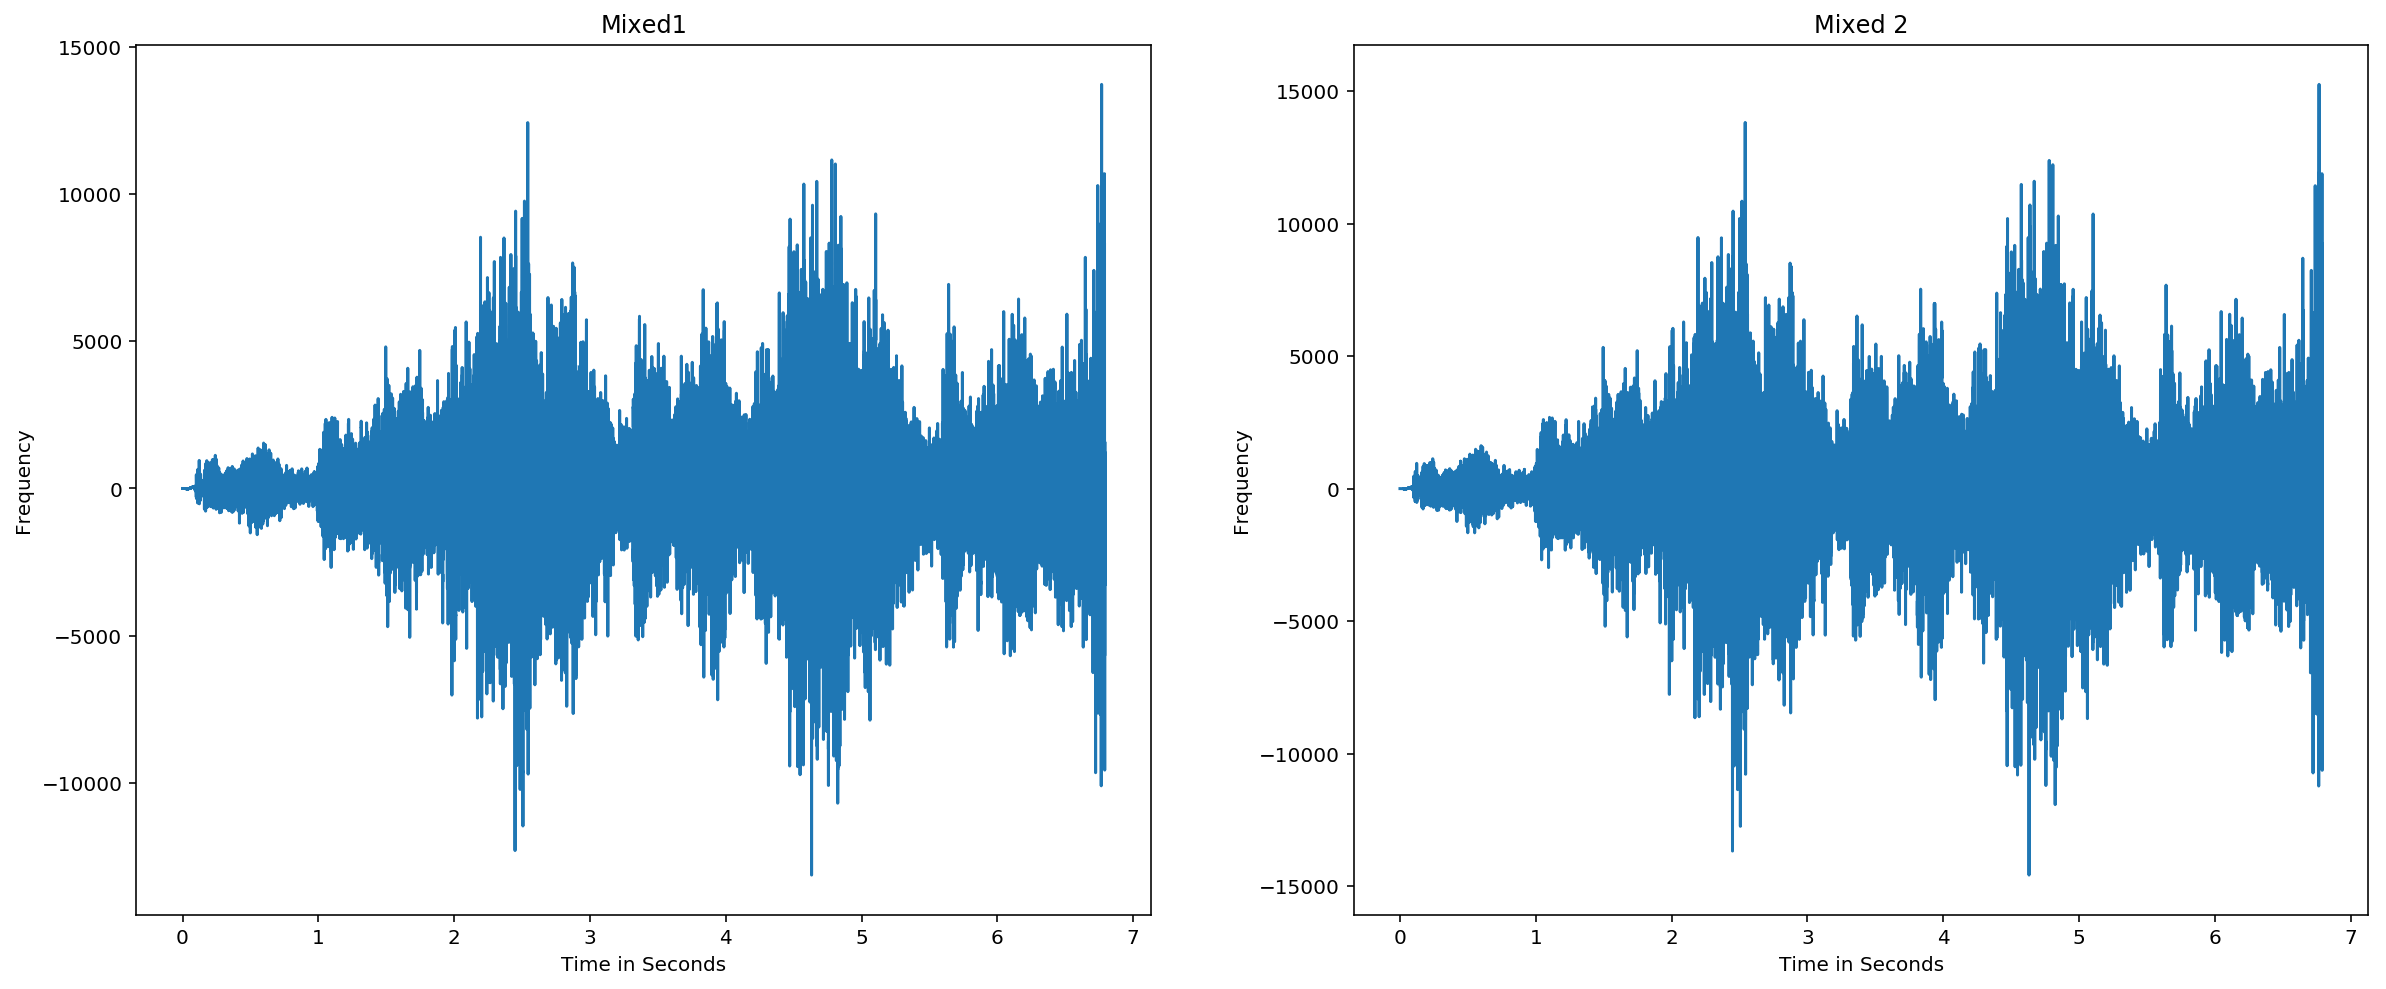

In [12]:
fig, axes = plt.subplots(1,2, figsize = (20,8))


axes[0].plot(timeArray, mixed1)
axes[1].plot(timeArray,mixed2)


axes[0].set_xlabel("Time in Seconds")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Mixed1")


axes[1].set_xlabel("Time in Seconds")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Mixed 2")

In [64]:
mix_comb = np.c_[mixed1,mixed2]#((mixed1.ravel(),mixed2.ravel()))

In [65]:
print (mix_comb.shape)
mix_comb


(149760, 2)


array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ..., 
       [ 1583,  1759],
       [ 1279,  1422],
       [-5633, -6259]], dtype=int16)

In [66]:
mix_comb

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ..., 
       [ 1583,  1759],
       [ 1279,  1422],
       [-5633, -6259]], dtype=int16)

In [79]:
from sklearn.decomposition import FastICA
# run ICA on the samples
ml = FastICA(2)
mix_transform = ml.fit_transform(mix_comb)

In [80]:
mix_transform

array([[ -3.34198114e-06,  -2.81202565e-06],
       [ -3.34198114e-06,  -2.81202565e-06],
       [ -3.34198114e-06,  -2.81202565e-06],
       ..., 
       [ -3.39962111e-05,   2.26899805e-03],
       [ -1.36720327e-04,   1.84081628e-03],
       [  6.71027406e-05,  -8.08401618e-03]])

In [90]:

# normalize each source by dividing by it's absolute maximum value, then multiply samples by 15252 to restore power
normed_comb_1 = (mix_transform[:,0] / max(abs(mix_transform[:,0]))) * 15252
normed_comb_2 = (mix_transform[:,1] / max(abs(mix_transform[:,1]))) * 15252

In [91]:
saved_arr_1 = normed_comb.astype("int16")
saved_arr_2 = normed_comb_2.astype("int16")

In [93]:
# save wavs to disk. 
# note #1: you must use the same 'rate' from when loading the mixed samples
# note #2: you must change the type of the samples to np.int16 before saving
from scipy.io.wavfile import write
write('archer.wav', fs, saved_arr_1)
write("music.wav", fs, saved_arr_2 )


In [95]:
# use wavPlayer("file.wav") to listen to them
# what was the guy saying? which TV show is this from? And i wont lie to you this mission will be dangerous, would you say we're venturing into a zone of danger, perhaps a danger zone. archer
ipd.Audio('music.wav') # load a local WAV file

In [96]:
ipd.Audio('archer.wav') # load a local WAV file